In [1]:
#### 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
# CSV 파일 불러오기
df = pd.read_csv('/Users/kimgayeong/Desktop/데이터톤/data 3/실습데이터.csv') 

In [3]:
df1 = pd.read_csv('/Users/kimgayeong/Desktop/데이터톤/data 3/raw_total_data.csv')

In [4]:
# 1. 컬럼별 결측치 개수 확인
print(df.isnull().sum())
print(df1.isnull().sum())

# 2. 결측치 비율 확인 (%)
print(df.isnull().mean() * 100)
print(df1.isnull().mean() * 100)

# 3. 결측치가 있는 행만 보기
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows.head())
missing_rows1 = df1[df1.isnull().any(axis=1)]
print(missing_rows1.head())

Timestamp                            0
OUTPUT_COUNT_DAY_1.xlsx              0
KO6_MOTOR_SET_FREQ.xlsx              0
CUTTING_SET_FREQ.xlsx                0
STATUS.xlsx                          0
KO5_MOTOR_SET_FREQ.xlsx              0
METAL_OIL_SUPPLY_PRESS_CONTR.xlsx    0
KO4_MOTOR_SET_FREQ.xlsx              0
KO2_MOTOR_SET_FREQ.xlsx              0
MAIN_MOTOR_CURR.xlsx                 0
KO3_MOTOR_SET_FREQ.xlsx              0
TRANS_POS_UP_SET_H.xlsx              0
TRANS_POS_RIGHT_SET_L.xlsx           0
TONGS_INVERTER_ALM_ERR_CD.xlsx       0
KO1_MOTOR_SET_FREQ.xlsx              0
KO3_MOTOR_INVERTER_ALM.xlsx          0
MAIN_MOTOR_RPM.xlsx                  0
TRANS_CURR.xlsx                      0
KO1_MOTOR_CURR.xlsx                  0
TRANS_INVERTER_ALM_ERR_CD.xlsx       0
TONGS_CAST_SET_FREQ.xlsx             0
TRANS_POS_LEFT_SET_H.xlsx            0
KO4_MOTOR_INVERTER_ALM.xlsx          0
TRANS_POS_DOWN_SET_L.xlsx            0
KO6_MOTOR_CURR.xlsx                  0
OIL_SUPPLY_PRESS.xlsx    

In [5]:
columns_to_drop = [
    'KO6_MOTOR_SET_FREQ.xlsx', 'KO6_MOTOR_CURR.xlsx', 'KO6_MOTOR_INVERTER_ALM.xlsx',
    'TRANS_POS_LEFT.xlsx', 'TRANS_POS_RIGHT.xlsx', 'TRANS_POS_UP.xlsx', 'TRANS_POS_DOWN.xlsx',
    'TRANS_POS_LEFT_SET_H.xlsx', 'TRANS_POS_RIGHT_SET_H.xlsx', 'TRANS_POS_UP_SET_H.xlsx', 'TRANS_POS_DOWN_SET_H.xlsx',
    'TRANS_POS_LEFT_SET_L.xlsx', 'TRANS_POS_RIGHT_SET_L.xlsx', 'TRANS_POS_UP_SET_L.xlsx', 'TRANS_POS_DOWN_SET_L.xlsx'
]

df = df.drop(columns=columns_to_drop, errors='ignore')

In [6]:
columns_to_drop = [
    'KO6_MOTOR_SET_FREQ.xlsx', 'KO6_MOTOR_CURR.xlsx', 'KO6_MOTOR_INVERTER_ALM.xlsx',
    'TRANS_POS_LEFT.xlsx', 'TRANS_POS_RIGHT.xlsx', 'TRANS_POS_UP.xlsx', 'TRANS_POS_DOWN.xlsx',
    'TRANS_POS_LEFT_SET_H.xlsx', 'TRANS_POS_RIGHT_SET_H.xlsx', 'TRANS_POS_UP_SET_H.xlsx', 'TRANS_POS_DOWN_SET_H.xlsx',
    'TRANS_POS_LEFT_SET_L.xlsx', 'TRANS_POS_RIGHT_SET_L.xlsx', 'TRANS_POS_UP_SET_L.xlsx', 'TRANS_POS_DOWN_SET_L.xlsx'
]

df1 = df1.drop(columns=columns_to_drop, errors='ignore')

In [7]:
from sklearn.cluster import KMeans

features = df[['MAIN_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx', 'MAIN_MOTOR_RPM.xlsx']].dropna()
kmeans = KMeans(n_clusters=3).fit(features)
df['cluster'] = kmeans.labels_

In [8]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print(cluster_centers)

   MAIN_MOTOR_SET_FREQ.xlsx  MAIN_MOTOR_CURR.xlsx  MAIN_MOTOR_RPM.xlsx
0               4136.404545           4736.077223         12971.704545
1               2214.101833             18.857810             6.646431
2               2168.857805           4790.294077          8099.864741


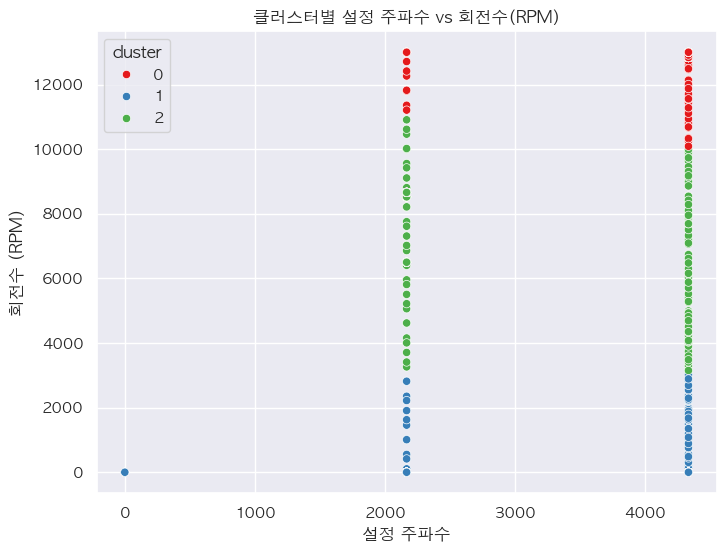

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MAIN_MOTOR_SET_FREQ.xlsx', y='MAIN_MOTOR_RPM.xlsx', hue='cluster', palette='Set1')
plt.title('클러스터별 설정 주파수 vs 회전수(RPM)')
plt.xlabel('설정 주파수')
plt.ylabel('회전수 (RPM)')
plt.grid(True)
plt.show()

In [10]:
df.groupby('cluster')[['MAIN_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx', 'MAIN_MOTOR_RPM.xlsx']].mean()

,MAIN_MOTOR_SET_FREQ.xlsx,MAIN_MOTOR_CURR.xlsx,MAIN_MOTOR_RPM.xlsx
cluster,,,
0,4136.404545,4736.077223,12971.704545
1,2214.101833,18.857810,6.646431
2,2168.857805,4790.294077,8099.864741


In [11]:
# 그룹별 평균 계산
grouped_df = df.groupby('cluster')[['MAIN_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx', 'MAIN_MOTOR_RPM.xlsx']].mean()

# 인덱스(cluster)를 포함해서 CSV 저장
grouped_df.to_csv("cluster_grouped_motor_stats.csv", index=True)

In [12]:
cluster_label_map = {
    0: '정상',
    1: '비효율',
    2: '이상작동'
}
df['운전상태'] = df['cluster'].map(cluster_label_map)

In [13]:
import pandas as pd
from sklearn.cluster import KMeans

# 주요 feature 추출
features = df[['MAIN_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx', 'MAIN_MOTOR_RPM.xlsx']]

# 클러스터링
kmeans = KMeans(n_clusters=2, random_state=0)
df['cluster'] = kmeans.fit_predict(features)

# 클러스터별 평균 확인
print(df.groupby('cluster')[['MAIN_MOTOR_CURR.xlsx', 'MAIN_MOTOR_RPM.xlsx']].mean())

         MAIN_MOTOR_CURR.xlsx  MAIN_MOTOR_RPM.xlsx
cluster                                           
0                 4736.066432         12971.656708
1                 3990.890737          6743.687097


## 전류 평균이 낮고, RPM은 높은 클러스터 → 고효율

## 전류 평균이 높고, RPM은 낮은 클러스터 → 저효율

In [14]:
eff_0 = 12971.66 / 4736.07  # Cluster 0
eff_1 = 6743.69 / 3990.89   # Cluster 1

print(f"Cluster 0 효율지표: {eff_0:.4f}")
print(f"Cluster 1 효율지표: {eff_1:.4f}")

Cluster 0 효율지표: 2.7389
Cluster 1 효율지표: 1.6898


# 클러스터0: 고효율

In [15]:
cluster_counts = df['cluster'].value_counts().sort_index()
print(cluster_counts)

cluster
0    474445
1    104852
Name: count, dtype: int64


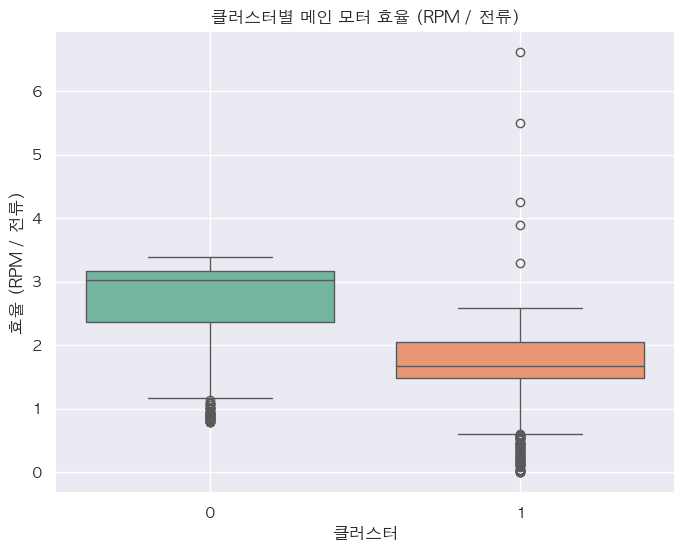

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 효율 컬럼 생성
df['efficiency'] = df['MAIN_MOTOR_RPM.xlsx'] / df['MAIN_MOTOR_CURR.xlsx']

# 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='cluster', y='efficiency', palette='Set2')
plt.title('클러스터별 메인 모터 효율 (RPM / 전류)')
plt.xlabel('클러스터')
plt.ylabel('효율 (RPM / 전류)')
plt.grid(True)
plt.show()

In [17]:
high_eff_data = df[df['cluster'].isin([0])]
low_eff_data = df[df['cluster'].isin([1])]

variables_to_compare = ['MAIN_MOTOR_RPM.xlsx', 'MAIN_MOTOR_CURR.xlsx']  # 필요한 변수 추가 가능
high_eff_stats = high_eff_data[variables_to_compare].mean()
low_eff_stats = low_eff_data[variables_to_compare].mean()

comparison_df = pd.DataFrame({
    'High Efficiency Mean': high_eff_stats,
    'Low Efficiency Mean': low_eff_stats
})

print(comparison_df)

                      High Efficiency Mean  Low Efficiency Mean
MAIN_MOTOR_RPM.xlsx           12971.656708          6743.687097
MAIN_MOTOR_CURR.xlsx           4736.066432          3990.890737


In [18]:
#두 클러스터 간의 값 차이가 '통계적으로 유의한가?'를 확인
from scipy.stats import ttest_ind

for var in variables_to_compare:
    t_stat, p_value = ttest_ind(high_eff_data[var], low_eff_data[var], equal_var=False)
    print(f"{var}: p-value = {p_value:.4f}")

MAIN_MOTOR_RPM.xlsx: p-value = 0.0000
MAIN_MOTOR_CURR.xlsx: p-value = 0.0000


MAIN_MOTOR_RPM.xlsx: p-value = 0.0000 → 고효율/저효율 클러스터 간 RPM 차이가 통계적으로 매우 유의미

MAIN_MOTOR_CURR.xlsx: p-value = 0.0000 → 전류 역시 유의미하게 차이

즉, 고효율과 저효율 클러스터는 RPM과 전류 모두에서 뚜렷한 차이를 보이며, 이는 단순한 우연이 아니라 실질적인 운전 조건의 차이에서 비롯된 것이라고 할 수 있음.

In [19]:
print(df.columns.tolist())

['Timestamp', 'OUTPUT_COUNT_DAY_1.xlsx', 'CUTTING_SET_FREQ.xlsx', 'STATUS.xlsx', 'KO5_MOTOR_SET_FREQ.xlsx', 'METAL_OIL_SUPPLY_PRESS_CONTR.xlsx', 'KO4_MOTOR_SET_FREQ.xlsx', 'KO2_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx', 'KO3_MOTOR_SET_FREQ.xlsx', 'TONGS_INVERTER_ALM_ERR_CD.xlsx', 'KO1_MOTOR_SET_FREQ.xlsx', 'KO3_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_RPM.xlsx', 'TRANS_CURR.xlsx', 'KO1_MOTOR_CURR.xlsx', 'TRANS_INVERTER_ALM_ERR_CD.xlsx', 'TONGS_CAST_SET_FREQ.xlsx', 'KO4_MOTOR_INVERTER_ALM.xlsx', 'OIL_SUPPLY_PRESS.xlsx', 'KO2_MOTOR_INVERTER_ALM.xlsx', 'KO3_MOTOR_CURR.xlsx', 'TONGS_POS.xlsx', 'WORK_OIL_SUPPLY_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx', 'TONGS_CAST_CURR.xlsx', 'CUTTING_INVERTER_ALM_ERR_CD.xlsx', 'KO4_MOTOR_CURR.xlsx', 'METAL_OIL_SUPPLY_PRESS_CUT.xlsx', 'MAIN_AIR_PRESS.xlsx', 'TRANS_SET_FREQ.xlsx', 'METAL_TEMP_CUT.xlsx', 'KO5_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_SET_FREQ.xlsx', 'OIL_PRESS_LEVEL_ALM.xlsx', 'CUTTING_CURR.xlsx', 'KO5_MOTOR_CURR.xlsx', 'KO2_MOTOR_CURR.xlsx', 'KO1_

In [20]:
# 분석 대상 변수들
target_vars = [
    'efficiency',
    'MAIN_MOTOR_SET_FREQ.xlsx',
    'MAIN_MOTOR_CURR.xlsx',
    'TRANS_CURR.xlsx',
    'OIL_SUPPLY_PRESS.xlsx',
    'WORK_OIL_SUPPLY_PRESS.xlsx',
    'MAIN_AIR_PRESS.xlsx',
    'METAL_TEMP_CONTROL.xlsx',
    'METAL_TEMP_CUT.xlsx'
]

# 상관관계 분석
correlation = df[target_vars].corr()
print(correlation['efficiency'].sort_values(ascending=False))

efficiency                    1.000000
MAIN_MOTOR_SET_FREQ.xlsx      0.532412
MAIN_AIR_PRESS.xlsx           0.278735
METAL_TEMP_CONTROL.xlsx       0.151507
WORK_OIL_SUPPLY_PRESS.xlsx    0.136899
METAL_TEMP_CUT.xlsx           0.129767
OIL_SUPPLY_PRESS.xlsx        -0.038531
MAIN_MOTOR_CURR.xlsx         -0.724555
TRANS_CURR.xlsx                    NaN
Name: efficiency, dtype: float64


| 변수                                | 상관계수        | 해석                                     |
| --------------------------------- | ----------- | -------------------------------------- |
| **MAIN\_MOTOR\_CURR.xlsx**        | **-0.7246** | 가장 큰 음의 상관관계 → 전류가 클수록 효율 저하           |
| **MAIN\_MOTOR\_SET\_FREQ.xlsx**   | **+0.5324** | 주파수가 높을수록 효율 증가 → 목표 RPM이 높을수록 효율적인 운전 |
| **MAIN\_AIR\_PRESS.xlsx**         | +0.2787     | 다소 양의 상관관계 → 공기압이 높을수록 효율 증가 가능성       |
| **METAL\_TEMP\_CONTROL.xlsx**     | +0.1515     | 약한 양의 상관관계 → 높은 온도가 효율과 약간 연관          |
| **WORK\_OIL\_SUPPLY\_PRESS.xlsx** | +0.1369     | 거의 무관하지만 약한 양의 상관관계                    |
| **METAL\_TEMP\_CUT.xlsx**         | +0.1298     | 거의 무관 수준의 관계                           |
| **OIL\_SUPPLY\_PRESS.xlsx**       | -0.0385     | 상관 거의 없음                               |
| **TRANS\_CURR.xlsx**              | NaN         | 결측치 있음 → 데이터 자체가 부족하거나 전부 0일 수 있음      |

In [21]:
# 사용할 컬럼만 선택
cols = ['MAIN_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx', 'MAIN_MOTOR_RPM.xlsx']
corr_df = df[cols].corr()
print(corr_df)

                          MAIN_MOTOR_SET_FREQ.xlsx  MAIN_MOTOR_CURR.xlsx  \
MAIN_MOTOR_SET_FREQ.xlsx                  1.000000              0.183372   
MAIN_MOTOR_CURR.xlsx                      0.183372              1.000000   
MAIN_MOTOR_RPM.xlsx                       0.693199              0.526397   

                          MAIN_MOTOR_RPM.xlsx  
MAIN_MOTOR_SET_FREQ.xlsx             0.693199  
MAIN_MOTOR_CURR.xlsx                 0.526397  
MAIN_MOTOR_RPM.xlsx                  1.000000  


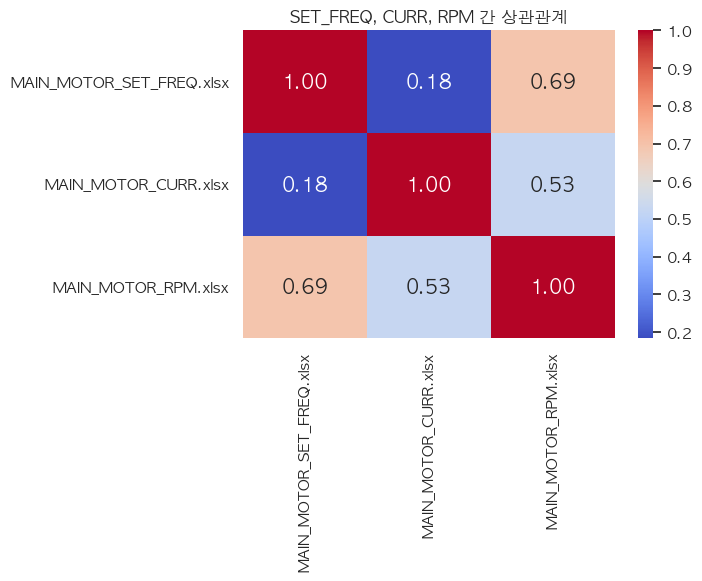

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("SET_FREQ, CURR, RPM 간 상관관계")
plt.show()